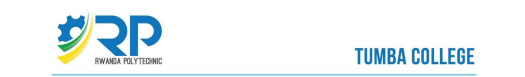

##  starting importing the libralies

In [2]:
import pandas as pd#library for dataframe interaction
import numpy as np#library for numerical computation
import seaborn as sns#library for plotting
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier#library for creating model

from sklearn.metrics import accuracy_score,classification_report#library for test accuracy
import warnings
warnings.filterwarnings('ignore')#LIBRARY FOR WARNINGS
from sklearn.preprocessing import StandardScaler, LabelEncoder# this library is for encoder

## reading dataset by displaying all datasets

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df=df.head(7)#used to read the first 7 column in my dataset
print(df)

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smo

## feature engineering

In [5]:
df.isnull().sum()# used to check the null variables

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  1
smoking_status       0
stroke               0
dtype: int64

In [6]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df=df.dropna()#used to delete null variable
print(df.isnull().sum())
df.shape

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


(4909, 12)

## Encoding

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder#library used to encode 

# Copy the data
df_encoded = df.copy()

# List of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check the encoded data
print(df_encoded.head())



      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   
5  56669       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  
5               1             186.21  29.0               1       1  


## selecting independent variable and pedendent

In [8]:

X=df_encoded[categorical_cols+ ['avg_glucose_level','heart_disease','hypertension','age','bmi']]
y=df_encoded['stroke']

## Mapping

In [9]:
# Manually map each categorical feature to numeric codes

# Gender mapping
gender_map = {'Female': 0, 'Male': 1}
df['gender_encoded'] = df['gender'].map(gender_map)

# Ever married mapping
ever_married_map = {'No': 0, 'Yes': 1}
df['ever_married_encoded'] = df['ever_married'].map(ever_married_map)

# Residence type mapping
residence_map = {'Rural': 0, 'Urban': 1}
df['Residence_type_encoded'] = df['Residence_type'].map(residence_map)

# Work type mapping
work_type_map = {
    'Private': 0,
    'Self-employed': 1,
    'Govt_job': 2,
    'children': 3,
    'Never_worked': 4
}
df['work_type_encoded'] = df['work_type'].map(work_type_map)

# Smoking status mapping
smoking_map = {
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
}
df['smoking_status_encoded'] = df['smoking_status'].map(smoking_map)

# ✅ Print clear mappings
print("\nMapping for gender:")
for k, v in gender_map.items():
    print(f"  {k} → {v}")

print("\nMapping for ever_married:")
for k, v in ever_married_map.items():
    print(f"  {k} → {v}")

print("\nMapping for work_type:")
for k, v in work_type_map.items():
    print(f"  {k} → {v}")

print("\nMapping for Residence_type:")
for k, v in residence_map.items():
    print(f"  {k} → {v}")

print("\nMapping for smoking_status:")
for k, v in smoking_map.items():
    print(f"  {k} → {v}")



Mapping for gender:
  Female → 0
  Male → 1

Mapping for ever_married:
  No → 0
  Yes → 1

Mapping for work_type:
  Private → 0
  Self-employed → 1
  Govt_job → 2
  children → 3
  Never_worked → 4

Mapping for Residence_type:
  Rural → 0
  Urban → 1

Mapping for smoking_status:
  never smoked → 0
  formerly smoked → 1
  smokes → 2
  Unknown → 3


## splitting data

In [10]:
from sklearn.model_selection import train_test_split#library for splitting into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_train 

,gender,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,heart_disease,hypertension,age,bmi
2760,0,0,2,1,2,73.49,0,0,24.00,23.5
2465,0,0,2,1,3,89.28,0,0,26.00,21.7
2108,0,0,2,1,3,73.50,0,0,22.00,41.3
4297,0,0,0,0,2,76.64,0,0,78.00,34.6
1224,1,1,2,1,3,88.57,0,0,65.00,29.0
...,...,...,...,...,...,...,...,...,...,...
1382,0,1,2,1,3,237.21,0,0,68.00,26.6
2470,0,1,3,0,2,84.88,0,0,50.00,27.1
4965,0,0,4,1,2,92.65,0,0,11.00,15.7
1328,0,1,2,1,0,103.09,0,0,40.00,35.6


## creating and fitting the model

In [11]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## predict for new data

In [12]:
pred = model.predict(X_test)
input_=[[67217,0,45.0,0,0,1,2,1,92.86,35.1,]]
y_pred=model.predict(input_)
print(y_pred)


[0]


## ACCURACY

In [13]:
from sklearn.metrics import accuracy_score,classification_report
accuracy = accuracy_score(y_test, pred)
print("✅ Model Accuracy:", accuracy)

✅ Model Accuracy: 0.9572301425661914


In [14]:
classification_report=classification_report(y_test,pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.50      0.02      0.05        42

    accuracy                           0.96       982
   macro avg       0.73      0.51      0.51       982
weighted avg       0.94      0.96      0.94       982



## Data scaling 

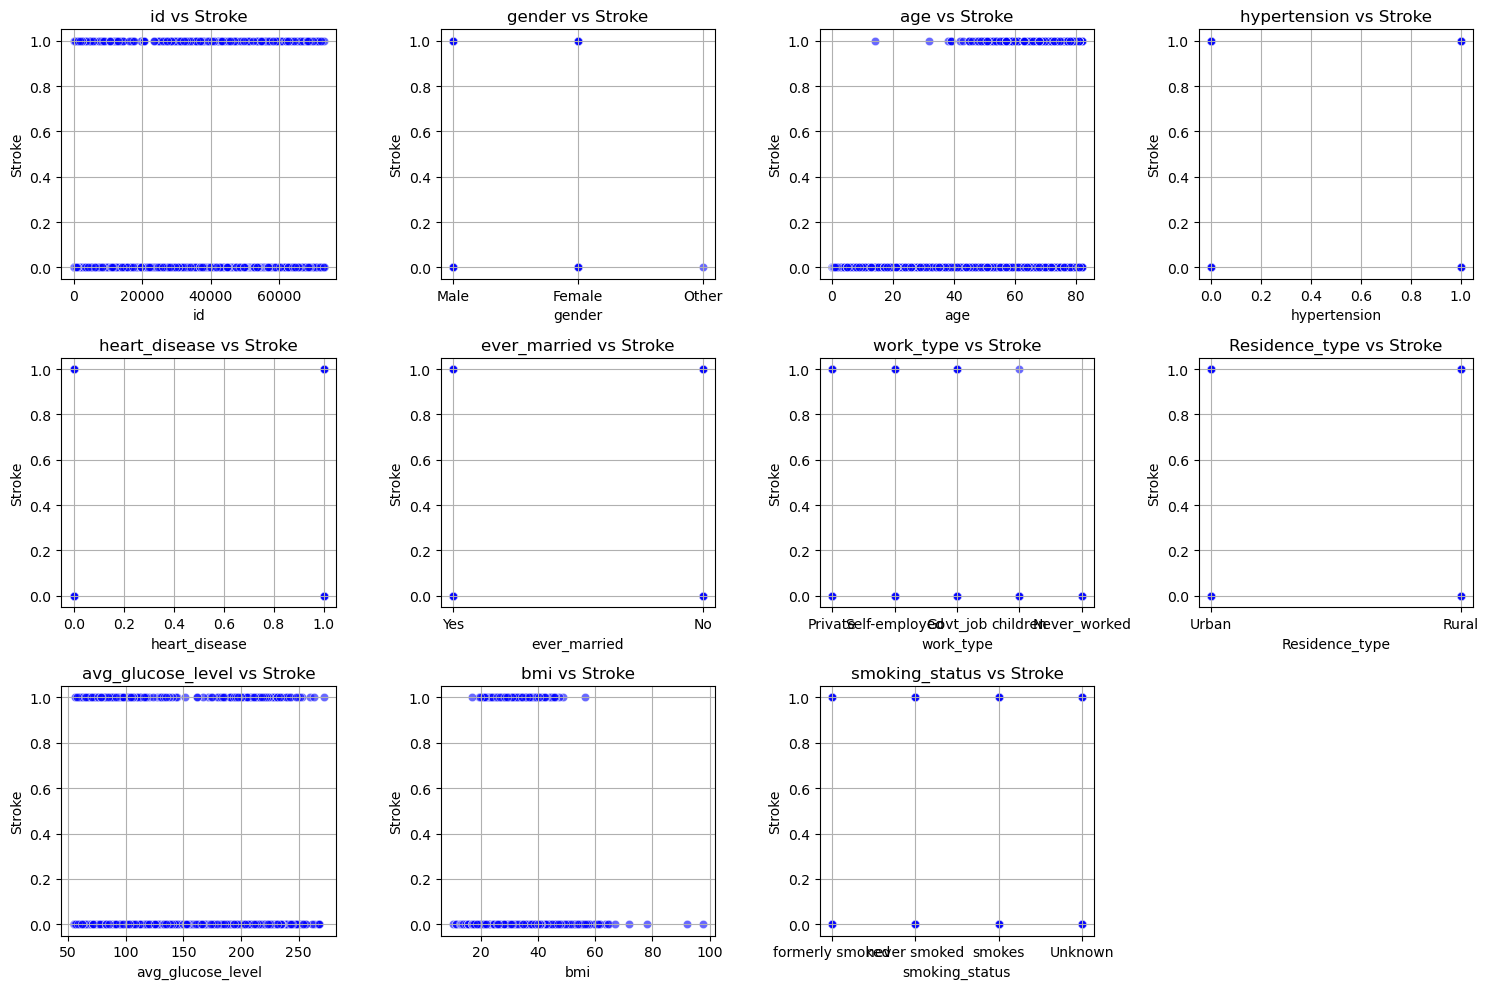

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Copy the dataframe
data = df.copy()
numeric_features = ['id', 'gender', 'age', 'hypertension', 'heart_disease',
                    'ever_married', 'work_type', 'Residence_type',
                    'avg_glucose_level', 'bmi', 'smoking_status']
n_cols = 4
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

# Plot
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=data[feature], y=data['stroke'], alpha=0.6, color='blue')
    plt.title(f'{feature} vs Stroke')
    plt.xlabel(feature)
    plt.ylabel('Stroke')
    plt.grid(True)

plt.tight_layout()
plt.show()


## correlation matrix visualization 

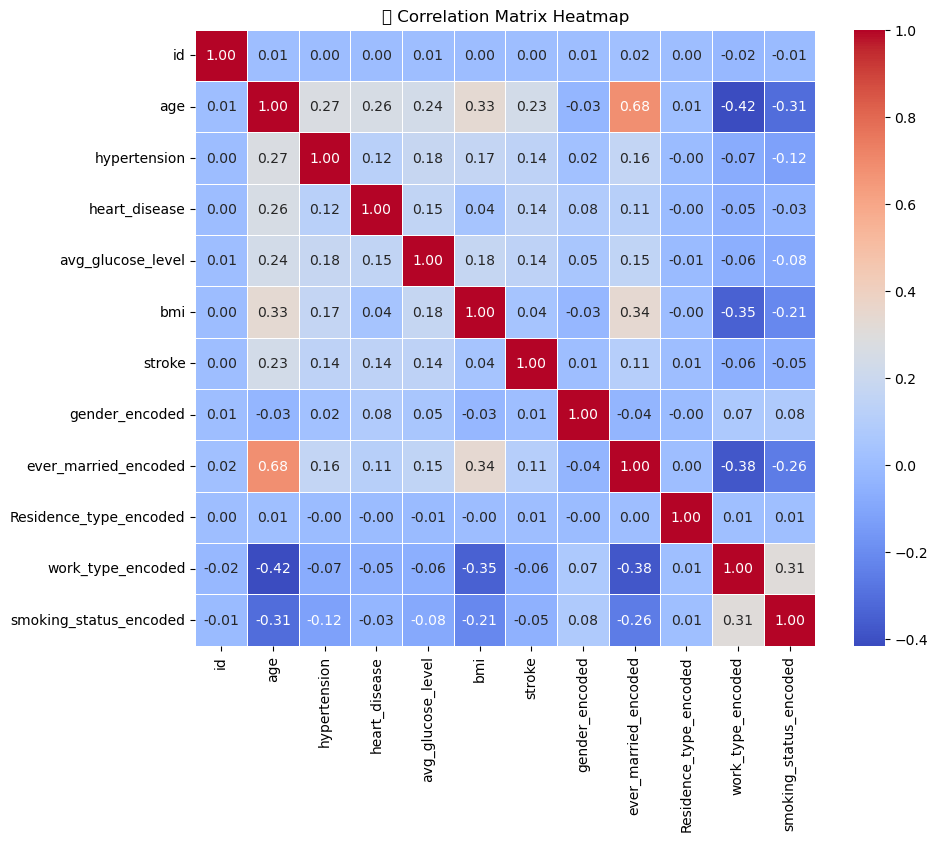

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Matrix Heatmap")
plt.show()

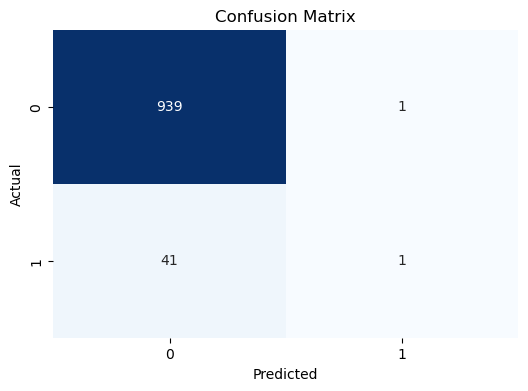

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = y_pred.ravel()  # Converts any 2D array to 1D

# Step 2: Verify lengths
if len(y_test) != len(pred):
    raise ValueError(f"Length mismatch: y_test has {len(y_test)} samples, y_pred has {len(pred)} samples.")
# Step 3: Compute confusion matrix
cm = confusion_matrix(y_test, pred)
# Step 4: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## Save model and load it 


In [18]:
import pickle
saving=model
with open("Saving.pkl",'wb') as file:
      pickle.dump(saving,file)
print('saved model was succesfully')

saved model was succesfully


In [19]:
loaded_model=pickle.load(open("C:/Users/IT/Desktop/ml/str pred/saving.pkl","rb"))

In [20]:
import sklearn
print(sklearn.__version__)

1.5.2


In [21]:
import pandas
print(pandas.__version__)

2.2.2


In [22]:
import numpy
print(numpy.__version__)

1.26.4


In [23]:
import streamlit
print(streamlit.__version__)

1.37.1
